In [9]:
library(tidyverse)
library(ggpubr)
library(apa)

df <- read.table("/public/frasergen/MED/work/zhangbo/tmp/cyb/merged_all_sites.frac.rename.xls", row.names = 1, header = T)

In [2]:
head(df)

,Targeted,Non.targeted,Mutant
,<dbl>,<dbl>,<dbl>
269,1.00,0.00,0.00
295,0.99,1.00,0.99
296,1.00,0.98,0.92
320,0.98,0.98,0.95
321,1.00,1.00,1.00
479,1.00,1.00,0.99


In [5]:
Means.XY<- c(5,5) #set the means of X and Y variables
r=.6 #Correlation value
CovMatrix.XY <- matrix(c(1,r,
                         r,1),2,2) # creates the covariate matrix 

# Build the correlated variables using mvrnorm. 
# Note: empirical=TRUE means make the correlation EXACTLY r. 
# empirical=FALSE, the correlation value would be normally distributed around r
library(MASS) #create data
CorrData<-mvrnorm(n=100, mu=Means.XY,Sigma=CovMatrix.XY, empirical=TRUE)

#Convert them to a "Data.Frame", which is like SPSS data window
CorrData<-as.data.frame(CorrData)
#lets add our labels to the vectors we created
colnames(CorrData) <- c("Happiness","IceCream")



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [7]:
head(CorrData)

,Happiness,IceCream
,<dbl>,<dbl>
1,5.095728,6.577714
2,3.461074,4.511164
3,5.701507,2.955689
4,4.332276,5.852452
5,4.579726,4.741705
6,4.699175,5.799389


`geom_smooth()` using formula 'y ~ x'



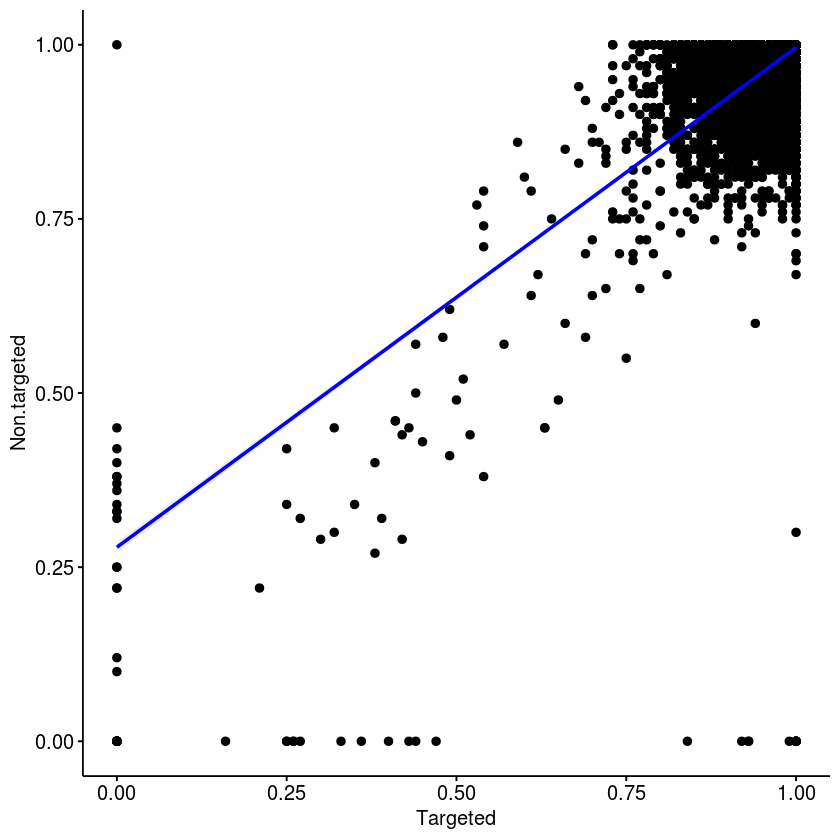

In [17]:
#Plot the data

ggscatter(df, x = "Targeted", y = "Non.targeted",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE, # Add confidence interval
   cor.coef = FALSE, # Add correlation coefficient. see ?stat_cor
   )





In [ ]:
ggscatter(df, x = "Targeted", y = "Non.targeted",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE, # Add confidence interval
   cor.coef = FALSE, # Add correlation coefficient. see ?stat_cor
   ) +  stat_cor(label.x = 1)



png 
  2

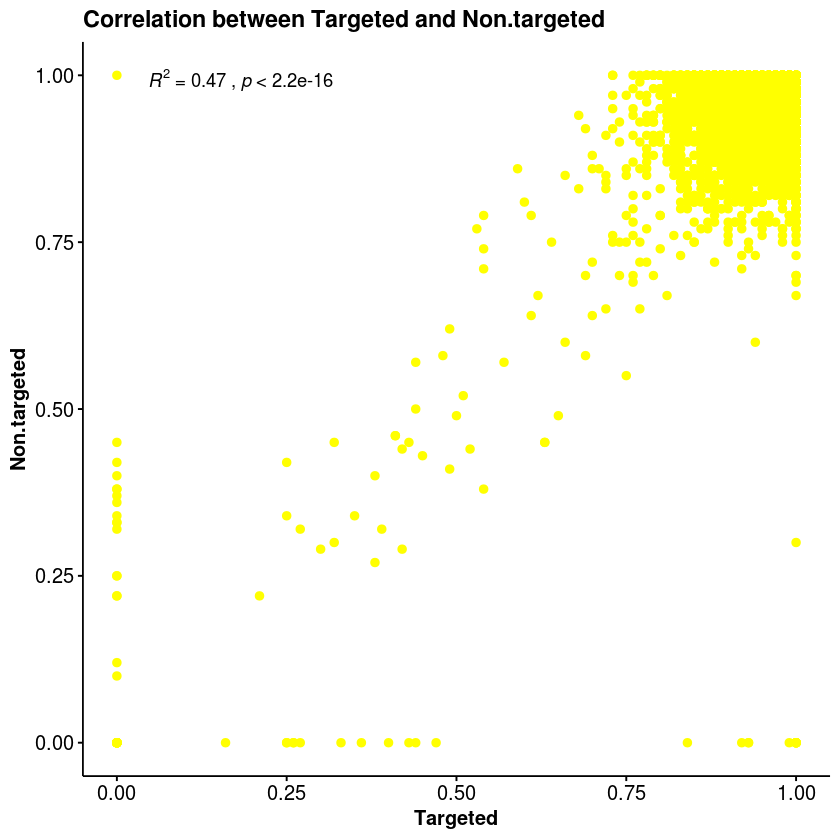

In [36]:
#gg <- ggscatter(df, x = "Targeted", y = "Non.targeted",
#   add = "reg.line",  # Add regressin line
#   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
#   color = "yellow",
#   conf.int = TRUE, # Add confidence interval
#   cor.coef = FALSE, # Add correlation coefficient. see ?stat_cor
#   ) + 
#  stat_cor(
#    aes(label = paste(..rr.label.., ..p.label.., sep = "~`,`~")), 
#    label.x = 1,
#    label.y.npc=1.0, label.x.npc = 0.5, hjust=0
#    )

gg <- ggscatter(df, x = "Targeted", y = "Non.targeted",
   color = "yellow",
   ) + 
  stat_cor(
    aes(label = paste(..rr.label.., ..p.label.., sep = "~`,`~")), 
    label.x = 1,
    label.y.npc=1.0, label.x.npc = 0.01, hjust= 3.5
    )


gg1<-ggpar(gg, xlab = "Targeted",ylab = "Non.targeted",main = "Correlation between Targeted and Non.targeted",
           font.main = c(14, "bold", "black"),
           font.x=c(12,"bold"),
           font.y = c(12,"bold"))#making font bold and beautiful 

gg1
pdf("Targeted_Non.targeted.pdf")
print(gg1)
dev.off()

png 
  2

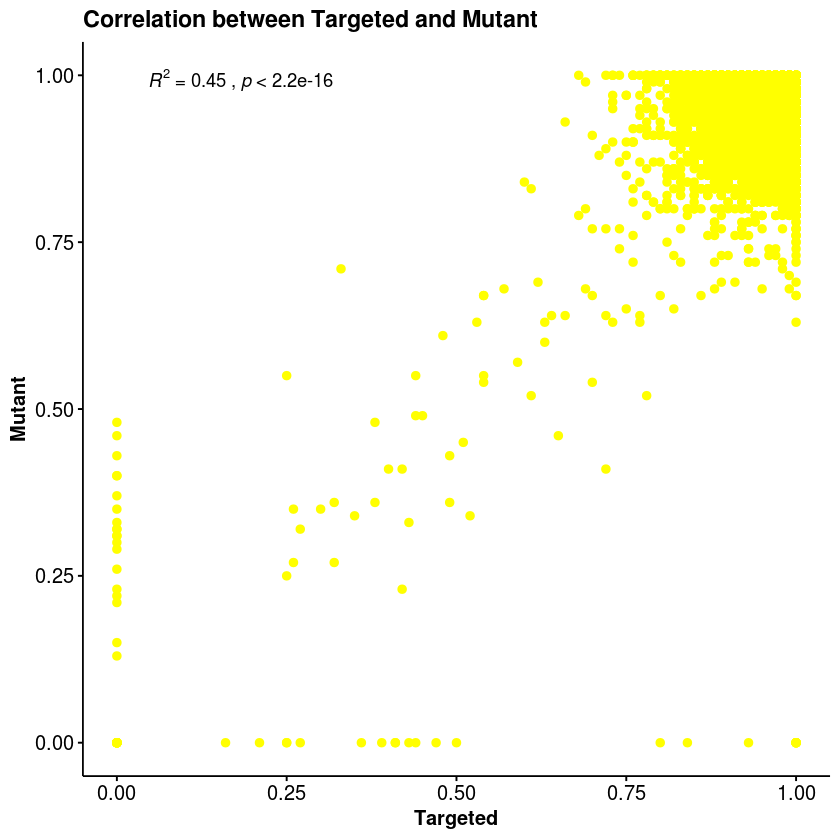

In [37]:
gg <- ggscatter(df, x = "Targeted", y = "Mutant",
   color = "yellow",
   ) + 
  stat_cor(
    aes(label = paste(..rr.label.., ..p.label.., sep = "~`,`~")), 
    label.x = 1,
    label.y.npc=1.0, label.x.npc = 0.01, hjust= 3.5
    )


gg1<-ggpar(gg, xlab = "Targeted",ylab = "Mutant",main = "Correlation between Targeted and Mutant",
           font.main = c(14, "bold", "black"),
           font.x=c(12,"bold"),
           font.y = c(12,"bold"))#making font bold and beautiful 

gg1
pdf("Targeted_Mutant.pdf")
print(gg1)
dev.off()

png 
  2

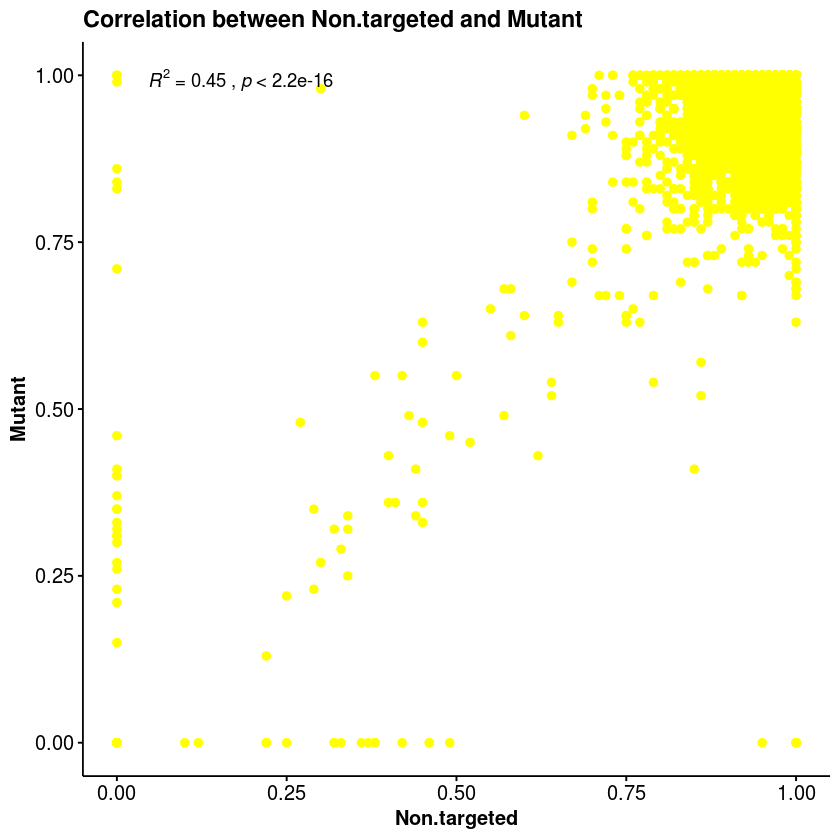

In [40]:
gg <- ggscatter(df, x = "Non.targeted", y = "Mutant",
   color = "yellow",
   ) + 
  stat_cor(
    aes(label = paste(..rr.label.., ..p.label.., sep = "~`,`~")), 
    label.x = 1,
    label.y.npc=1.0, label.x.npc = 0.01, hjust= 3.5
    )


gg1<-ggpar(gg, xlab = "Non.targeted",ylab = "Mutant",main = "Correlation between Non.targeted and Mutant",
           font.main = c(14, "bold", "black"),
           font.x=c(12,"bold"),
           font.y = c(12,"bold"))#making font bold and beautiful 

gg1
pdf("Non.targeted_Mutant.pdf")
print(gg1)
dev.off()

In [12]:
#Run Pearson’s r

df_Corr<-cor.test(df$Targeted, df$Non.targeted, 
         method = c("pearson"))
df_Corr
#Corr.Result.1<-cor.test(~Happiness + IceCream, data= CorrData,  
#         method = c("pearson"))



	Pearson's product-moment correlation

data:  df$Targeted and df$Non.targeted
t = 184.61, df = 38373, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6805101 0.6911084
sample estimates:
      cor 
0.6858456 


Warning message:
“Use of `df$Targeted` is discouraged. Use `Targeted` instead.”
Warning message:
“Use of `df$Non.targeted` is discouraged. Use `Non.targeted` instead.”
Warning message:
“Use of `df$Targeted` is discouraged. Use `Targeted` instead.”
Warning message:
“Use of `df$Non.targeted` is discouraged. Use `Non.targeted` instead.”
Warning message:
“Use of `df$Targeted` is discouraged. Use `Targeted` instead.”
Warning message:
“Use of `df$Non.targeted` is discouraged. Use `Non.targeted` instead.”
`geom_smooth()` using formula 'y ~ x'



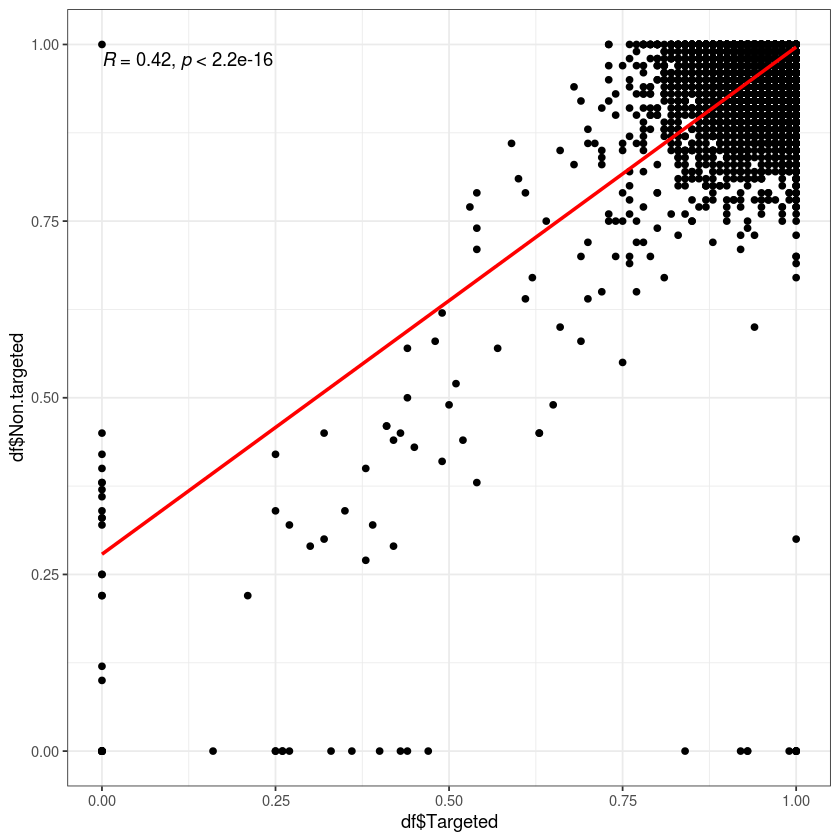

In [15]:
ggplot(df, aes(x=df$Targeted, y = df$Non.targeted)) + 
  geom_point()+ geom_smooth(method = 'lm', se = F, color = 'red')+theme_bw()+stat_cor(data=df, method = "spearman")

> http://www.alexanderdemos.org/Class1.html
https://r-coder.com/correlation-plot-r/
https://github.com/kassambara/ggpubr/issues/98

https://stackoverflow.com/questions/58606027/how-to-annotate-r-sq-and-p-value-on-facet-grid-plots-in-r

https://stackoverflow.com/questions/61266084/can-we-neatly-align-the-regression-equation-and-r2-and-p-value

https://stackoverflow.com/questions/67160988/what-determines-the-parent-in-ggplot-normalized-parent-coordinates

https://stackoverflow.com/questions/65672966/obtain-correlation-trendlines-and-r-value-specific-to-each-y-axis-variable-in-r

https://stackoverflow.com/questions/60143052/how-to-add-r2-for-each-facet-of-ggplot-in-r




stat_cor(method = "pearson", aes(label = ..r.label..))


In [ ]:
library(ggpubr)
ggscatter(
  iris, x = "Sepal.Length", y = "Petal.Width", 
  color = "Species"
  ) +
  stat_smooth(
    aes(color = Species), method = "lm",
    se = FALSE, fullrange = TRUE
    ) +
  stat_cor(
    aes(color = Species, label = paste0("R = ", ..r.., ", P = ", ..p..)), 
    label.x.npc = 0.5, 
    label.y.npc = 0.3, hjust = 0
    )